<div style="font-family: 'Source Code Pro'; font-size: 24px;">

# Arquitectura del computador

Existen dos tipos de arquitecturas de procesadores, RISC (operaciones entre registros y luego utilizamos load y store para subir y bajar de memoria, ej: ARMv8) y por otro lado CISC (trabajo en memoria, tengo menos registros, la realidad es que tienen instrucciones mas complejas pero tambien la complejidad hace que sean mas lentas.)

**Arquitectura de Von Neumann:** John Von Neumann fue un matematico y fisico que trabajo en EEUU y en el anio 1945 describio una estructura de ordenador que aun hoy es la base de casi todos los ordenadores existentes.

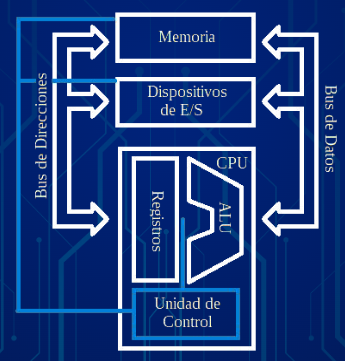

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **La CPU**

####  **Bloque de registros**: 

Dentro de la CPU existe un conjunto de posiciones de memoria llamados registros, cuyos valores son utilizados durante la ejecuccion de ciertas instrucciones. En otras palabras, son pequenios espacios de almacenamiento dentro de la CPU que almacenan temporalmente datos e instrucciones durante la ejecucion de un programa. Son mucho mas rapidos que la memoria RAM, pero tienen una capacidad muy limitada.

Algunos son de propositos generales, pero otros tienen usos especificos:

- Instruction Pointer: Contiene la direccion de memoria de la que se levantara la proxima instruccion a ejecutar.

- Stack Pointer: Contiene la direccion de la pila usada para almacenar y recuperar informacion de direcciones y datos

- Registro de Instrucción (IR): Almacena la instrucción actualmente en ejecución.

- Contador de Programa (PC): Contiene la dirección de la siguiente instrucción que se va a ejecutar.

- Registro Acumulador (ACC): Almacena los resultados intermedios de las operaciones realizadas por la ALU.

- Registro de Dirección de Memoria (MAR): Almacena la dirección de memoria que se está leyendo o escribiendo.

- Registro de Datos de Memoria (MDR): Almacena los datos que se van a escribir en la memoria o que se han leído de la memoria.

- Flags: Contiene el estado actual del procesador, como si una operacion ha resultado en cero, si ha habido un desbordamiento aritmetico, si se debe llevar a cabo una interrupcion, etc.

#### **Unidad aritmetico Logica (ALU)**:

Es la responsable de todas las operaciones matematicas (suma, resta, multiplicacion, etc), las logicas (and, or, not, etc.), y las comparaciones.

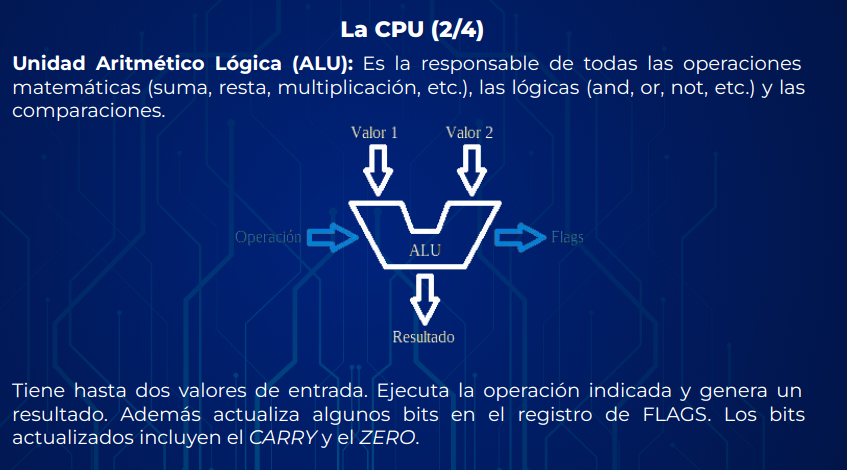

Tiene hasta dos valores de entrada. Ejecuta la operacion indicada y genera un resultado. Ademas actualiza algunos bits en el registro de FLAGS. Los bits actualizados incluyen el CARRY y el ZERO.

#### **Unidad de control (CU)**:

La unidad de control es responsable de dirigir el flujo de datos entre la ALU, los registros, la memopria y los dispositivos de entrada/salida. Se encarga de interpretar las instrucciones del programa y generar las seniales de control necesarias para ejecutar esas instrucciones.

**Ciclo de instruccion:** La unidad de control coordina el ciclo de instruccion, que consta de tres fases principales:

- Fetch (captura): Recuperar la instruccion de la memoria
- Decode (decodificacion): Intepretar la instruccion y determinar que operacion realizar
- Execute (ejecuccion): Realizar la operacion utlizando la ALU o realizar otras operaciones segun sea necesario.

**Seniales de control:** LA CU emite seniales de control que determinan que opeeracioenes deben realizarse y cuando. Estas seniales controlan la ALU, el acceso a la memoria, el movimiento de datos entre registros, etc.

#### **Memoria:**

Mas adelante hablaremos de distintos tipos de memoria, pero en principal hablaremos de dos tipos:

- Memoria de programa: Contiene las instrucciones que se ejecutaran, asi como cualquier dato que no cambie durante la ejecucion del programa. Esta memoria es de solo lectura.

- Memoria de datos: Contiene los datos que manipula el porgrama. Esta memoria es de lectura/escritura.

Independientemente del tipo, cada CPU puede acceder a un conjunto limitado (finito) de palabras de memoria. Tanto la cantidad de palabras como el tamanio de la misma, son condiciones de disenio de la CPU y no son alterables por el programador.

#### **Dispositivos de Entrada/Salida (I/O):**

Todo sistema computacional necesita interactuar con el mundo a su alrededor.

Los dispositivos de I/O, por ejemplo teclados, pantallas, impresoras, etc. Permiten esta interaccion, pero no son los unicos. Si pensamos, por ejemplo, en la micro-computadora dentro y fuera del equipo, la hora del dia y como salida el contador que arranca el motor que genera el frio.

Por lo general, debido a que estos dispositivos hacen de interfaz con el mundo, suelen ser muchisimo mas lentos que la memoira. los programas deben considerar esto al usarlos.

#### **Bus de direcciones:**

El bus de direcciones es la forma en que la CPU indica cual de todas las palabras de memoria y/o dispositivos de I/O desea leer o escribir. En ancho del BUS, o sea la cantidad de bits que lo componen, determina la cantidad maxima de palabras a las que esa CPU puede acceder. La cantidad maxima de palabras a las que se puede acceder con un BUS de n bits esta dada por:

Cantidad de palabras = $2^n$

Dado que el encapsulado (cantidad fisica de terminales del chip) es una variable importante en el costo, algunos procesadores utilizan un artilugio para ampliar la cantidad de palabras a laq ue se puede acceder. Conisste en usar n lineas para sacar la mitad de las lineas del BUS y luego usar las mismas lineas n para sacar la otra mitad. Este metodo se denomina multiplexado en el tiempo, y permite acceder a un espacio de 2^2n direcciones con n lineas. La contrapartida es que acceder a la memoria lleva el mas tiempo, por lo que la performance cae.

#### **Bus de datos**

El bus de datos permite el intercambio de informacion entre la CPU y la memoria y/o los dispositivos de I/O. El ancho de este BUS determina cuanta informacion se intercamba a la vez.

Buses de datos mas grandes normalmente aceleran el proceso de la infromacion, pero hacen mas complejo el circuito externo al procesador y aumentan el costo. Los primeros procesadores tenian Buses de datos de 4 bits, hoy procesador como Intel Itanium tienen buses de datos de 128 bits.

#### **La unidad de control:**

La unidad de control es el bloque que orquesta el funcionamiento del conjunto. Ejecutadno un paso por ciclo de reloj va habilitando los distintos BUSES de forma que se pueda levantar la siguiente instruccion de memoria, luego la decodifica y ajusta el flujo de datos por los BUSES internos y externos para ejecutarla, por ulitmo vuelve a ajustar los BUSES externos para guardar los resultados en memoria si corresponde. 


#### **Funcionamiento de la CPU:**

**1- Fetch (Captura):**

- La CPU utiliza el contador de programas (PC) para obtener la direccion de la siguiente instruccion que se debe ejecutar.

- Esta direccion se envia al registro de direccion de memoria (MAR), y luego se lee la instruccion desde esa direccion de la memoria.

- La instruccion leida se almacena en el registro de instruccion (IR).

**2- Decode (Decodificacion):**

- La undiad de control interpreta la instruccion almacenada en el IR.

- Identifica que operaacion debe realizarse y que operandos se requieren (ya sean registros, datos inmeditados o datos de la memoria).

**3- Execute (ejecucion):**

- La unidad de control emite seniales a la ALU para realizar la operacion requerida.

- Si la instruccion es aritmetico o logica, la ALU realiza la opercaion.

- Si la instruccion implica mover datos, como leer o escribir en memoria, la unidad de control gestiona esas operaciones.

- El resultado de la operacion se almacena en un registro o se escribe en la memoria.

**4- Store (Almacenamiento):**

- Si la instruccion requiere almaacenar un resultado, este se envia al regsitro de datos de memoria (MDR) y luego a la mempria principal, o se almacena en un registro especifico.

#### **Ejemplo de Ejecucion de Instruccion:**

Supongamos que la instruccion es sumar dos numeros almacenados en memoria:

1- Fetch: La CPU captura la instruccion de suma dese la memoria.

2- Decode: La unidad de control decodifica la instruccion e identifica que se deben sumar dos valores de memoria.

3- Execute: La ALU suma los valores y almacena el resultado en un registro.

4- Store: El resultado de la suma se almaacena de vuelta en la memoria o en otro registro.

#### **Ciclo de instruccion y Reloj:**

El ciclo de instruccion descrito (fetch-decode-execute-store) se repite continuamente mientras la CPU este activa y ejecutando un programa. Este ciclo esta sincronizado por la senial de reloj de la CPU, que marca el ritmo al que se realizan las operaciones. La velocidad del reloj (medida en Hz) determina cuantas operaciones puede realizar la CPU por segundo.

#### **Conclusion:**

La CPU es un componente complejo y poderoso que coordina todas las operaciones dentro de una computadora. Al combinar las funciones de la ALU, la Unidad de Control y los registros, la CPU puede ejecutar una variedad de instrucciones y procesar datos de manera eficiente, siguiendo la arquitectura de Von Neumann como base para su funcionamiento.


#### **Ejemplo de CPU:**

A continuacion veremos un diagrama interno de una CPU sencilla. Esta CPU no existe exactamente asi, dado que es una simplicacion para que sirva como primeera aproximacion. Entre las simplifaciones estan:

Tiene solamente dos registros de usuario, Ra y Rb.

Soporta de forma eficiente dos tipos de instrucciones:

1) Registro (operacion) Memoria --> Registro
2) Registro (operacion) Registro --> Memoria

Seria una CPU del tipo risc porque puede trabajar con memoria

En ambos casos, uno de los registros usados como parametros es el Rb.

Cada instruccion ocupa exactamente dos palabras

La ejecucion de cada instruccion tiene 4 fases:

1) Cargar IP
2) Cargar parametro de direccion
3) Ejecutar instruccion y guardar resultados
4) NOP

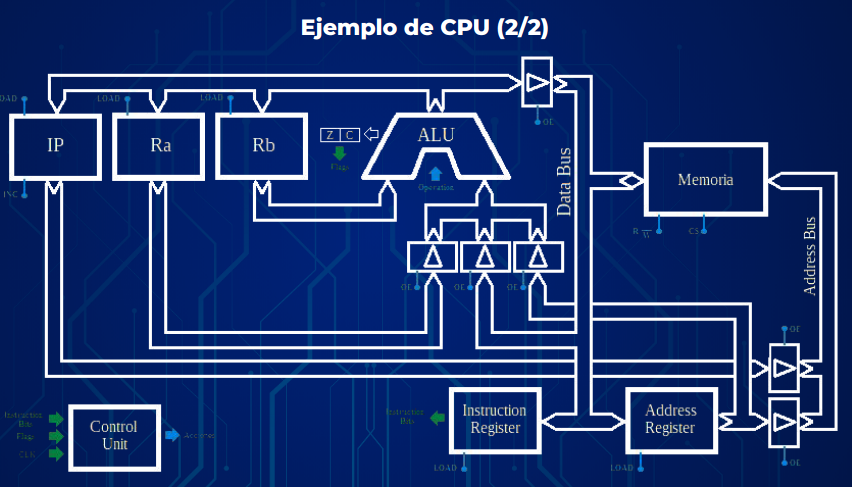
